<a href="https://colab.research.google.com/github/wavallejol/ColabChem2/blob/main/Sesi%C3%B3n8_RDKit_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

. 

<div align = "center"> ⬇️ Primero instalaremos los paquetes requeridos e importaremos las bibliotecas que utilizaremos para desarrollar las actividades ⬇️</a></div>

In [ ]:
!pip install rdkit-pypi

     |████████████████████████████████| 19.7 MB 1.2 MB/s 


In [ ]:
from rdkit import Chem #RDKit Chemistry
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG=True
rdDepictor.SetPreferCoordGen(True)
import requests

#***RDKit: Introducción***

# **Objetivos**
 
1.   Conocer comandos básicos del software RdKit utilizados para la representación de estructuras químicas 
2.   Aprender la representación de estructuras químicas utilzando notación SMILES

#**Introducción**
---
 
Este notebook presenta una introducción básica al software <a href="https://www.rdkit.org/">RdKit</a> haciendo especial énfasis en la representación de estructuras de moléculas químicas utilizando la notación <a href="https://es.wikipedia.org/wiki/SMILES">SMILES</a>.

El software RDKit es una herramienta de programación utilizada en química informática para realizar estudios de mineria de bases de datos, screening y estudios de estructura-actividad. Algunos de este tipo de herramientas de acceso abierto para uso en química informática incluyen: (i) <a href="https://cdk.github.io/">CDK</a>, (ii) <a href="http://www.bioconductor.org/packages/release/bioc/vignettes/ChemmineR/inst/doc/ChemmineR.html">ChemmineR</a>, (iii) <a href="https://lifescience.opensource.epam.com/indigo/">Indigo</a> (iv) <a href="http://openbabel.org/wiki/Main_Page">CDK</a>, (v) <a href="https://3d-e-chem.github.io/">3D-e-Chem</a>, (v) <a href="https://www.rdkit.org/">RdKit</a>. Una lista más amplia de opciones puede ser consultada en el siguiente <a href="https://en.wikipedia.org/wiki/List_of_Cheminformatics_toolkits">link</a>.


##**SMILES**

SMILES (**S**implified **M**olecular **I**nput **L**ine **E**ntry **S**pecification permite representar una estructura química utilizando código  <a href="https://es.wikipedia.org/wiki/ASCII">ACSII </a> un `string` (Código Estándar estadounidense para el Intercambio de Información); de esta manera puede ser intepretado facilmente por un ordenador.

En la actualidad existen diferentes formatos para la represetación de estructuras moleculares: (i) <a href="https://es.wikipedia.org/wiki/SMILES">SMILES</a>, (ii) <a href="https://es.wikipedia.org/wiki/International_Chemical_Identifier">InChI</a>. (iii) <a href="https://en.wikipedia.org/wiki/Chemical_table_fileS">MOL</a>, (iv)<a href="https://en.wikipedia.org/wiki/Chemical_file_format">SDF</a>. En el 2006 la IUPAC adoptó el formato  InChI como estandar internacional para la representación molecular. Sin embargo, SMILES goza de una gran aceptación y uso por su facilidad de interpretación y lectura humana.

En este Notebook utilizarémos el software  <a href="https://www.rdkit.org/">RDKit</a> por medio de Colabs. Iniciaremos revisando las reglas básicas para poder utilizar SMILES.

##**Reglas de Notación**

**Representación de enlaces:**

*  Enlace sencillo: NO se representa. Ejemplo de notación SMILES para molécula etano ($\small CH_{3}CH_{3}:CC$) 
*  Enlace doble: Se representa con el símbolo `=`. Ejemplo de notación SMILES para molécula eteno ($\small CH_{2}CH_{2}:C=C$) 
*  Enlace triple: Se representa con el símbolo `#`. Ejemplo de notación SMILES para  molécula etino ($\small CHCH:$$\small C$#$\small C$)
*  Los elementos se representan con su notación según la tabla periódica. Ejemplo de notación SMILES para molécula Cloruro de metilo($\small CH_{3}Cl:CCl$) 
*  No es necesario representar los átomos de hidrógeno, todos los demás elementos deben ser representados. Ejemplo de notación molécula metano ($\small CH_{4}:C$). Ejemplo de notación SMILES para molécula diclorometano ($\small CH_{2}Cl_{2}:ClCCl$)
*  Cuando sea necesaria información adicional para un elemento específico, se pueden utilizar corchetes. Ejemplo notación SMILES átomo de $\small Cu^{2+}:[Cu2+]$ 

**Ramificaciones**

*  La ramificación se representa con el símbolo `()` y este símbolo se debe colocar inmediatamente después del elemento al que se encuentra conectado. Ejemplo de notación SMILES para molécula 2-butanol ($\small (CH_{3})_{2}CHCH_{2}CH_{3}:CC(O)CC$). Ejemplo de notación SMILES para molécula 2-metil-2-butanol ($\small (CH_{3})_{2}COHCH_{2}CH_{3}:CC(C)(O)CC$) 

**Ciclos**

*  Los ciclos se identifican por el uso de números para indicar el átomo de apertura y cierre del anillo. Ejemplo de notación SMILES para molécula ciclopentano ($\small C1CCCC1$).

*  Los ciclos aromáticos se identifican por el uso de letras minúsculas para indicar los átomos que componen el anillo aromático. Ejemplo de notación SMILES para molécula benceno ($\small c1ccccc1$).
*  Algunas moléculas pueden tener más de una única representación válida en SMILES. Ejemplo de notación SMILES para molécula piridina: (i) $\small N1=CC=CC=C1$. (ii) $\small C1=CC=CN=C1$.  (iii) $\small C1=CN=CC=C1$. 

Existen distintos generadoresde cadenas SMILES para diferentes moléculas químicas. Adicionalmente, la mayoría de bases de datos utilizan este tipo de notación para referenciar moléculas. Para apoyarnos en la generación de las cadeas SMILES de nuestras moléculas, podemos utilizar cualquiera de los siguientes generadores de notación SMILES: (i) <a href="https://pubchem.ncbi.nlm.nih.gov/edit3/index.html">PubChem Sketcher</a>, (ii)<a href="http://www.cheminfo.org/flavor/malaria/Utilities/SMILES_generator___checker/index.html"> SmilesGeneratorChecker</a>

Con la información revisada y el programa RDKit realizarémos algunos ejercicios para representar diferentes tipos de moléculas utilizando la notación SMILES.


---
#**Actividad 1**


1.   Utilizando el comando `Chem.MolFromSmiles` genera la estructura química del etano, eteno y el etino.

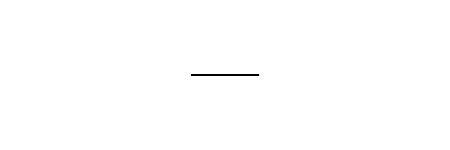

In [ ]:
etano = Chem.MolFromSmiles("CC")
etano

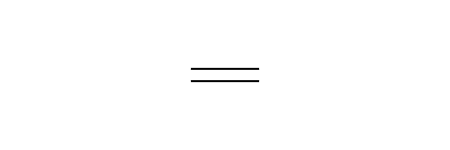

In [ ]:
eteno = Chem.MolFromSmiles("C=C")
eteno

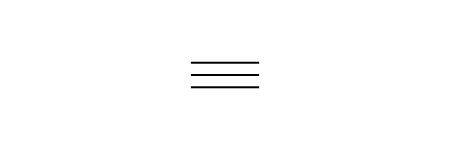

In [ ]:
etino = Chem.MolFromSmiles("C#C")
etino

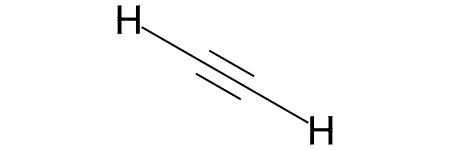

In [ ]:
etino= Chem.AddHs(etino)  #Se mostrará en la estructura los átomos de Hidrogeno
etino

2.   Utilizando el comando `Chem.MolFromSmiles` genera la estructura química del 2.metil-2-butanol, ciclohexano, ciclohexeno, benceno, piridina.

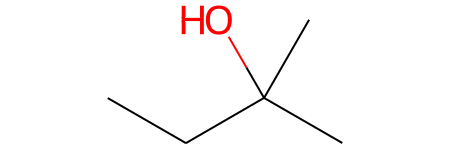

In [ ]:
metilbutanol = Chem.MolFromSmiles("CC(C)(O)CC")
metilbutanol

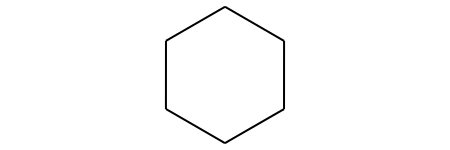

In [ ]:
ciclohexano = Chem.MolFromSmiles("C1CCCCC1")
ciclohexano

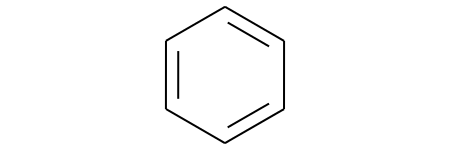

In [ ]:
benceno = Chem.MolFromSmiles("c1ccccc1")
benceno

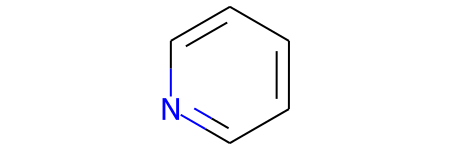

In [ ]:
piridina = Chem.MolFromSmiles("C1=CN=CC=C1")
piridina

3.   Ahora es tu turno, utilizando el comando `Chem.MolFromSmiles` genera la estructura química del naftaleno y el pirrol.

#**Actividad 2**

Cuando las moléculas son más complejas, la generación de la cadena SMILES puede presentar mayor dificultad. Para estos casos podémos utilizar un generador de SMILES o utilizar una base de datos. Hagámos un ejercicio con el generador de cadenas SMILES <a href="https://pubchem.ncbi.nlm.nih.gov/edit3/index.html">PubChem Sketcher</a>. 

1.   Abre en una nueva ventana el siguiente link: <a href="https://pubchem.ncbi.nlm.nih.gov/edit3/index.html">PubChem Sketcher</a>
1.   Utilizando el generador de SMILES crea la estructura de 2,4,6-Trinitrotolueno.
1.   Utilizando la siguiente celda de código genera la estructura química del 2,4,6-Trinitrotolueno a apartir de la cadena SMILES obtenida.

1.   Abre en una nueva ventana el siguiente alguno de los siguientes generadores de notación SMILES: (i) <a href="https://pubchem.ncbi.nlm.nih.gov/edit3/index.html">PubChem Sketcher</a>, (ii)<a href="http://www.cheminfo.org/flavor/malaria/Utilities/SMILES_generator___checker/index.html"> SmilesGeneratorChecker</a>
1.   Utilizando el generador de SMILES crea la estructura de la cianidina.
1.   Utilizando la siguiente celda de código genera la estructura química del la cianidina apartir de la cadena SMILES obtenida.

#**Actividad 3**

También podemos crear listas con las cadenas SMILES para representar varias moléculas al mismo tiempo. Vamos a crear una lista con todas las moléculas creadas en la actividad 1 y las vamos a presentar en un solo gráfico.

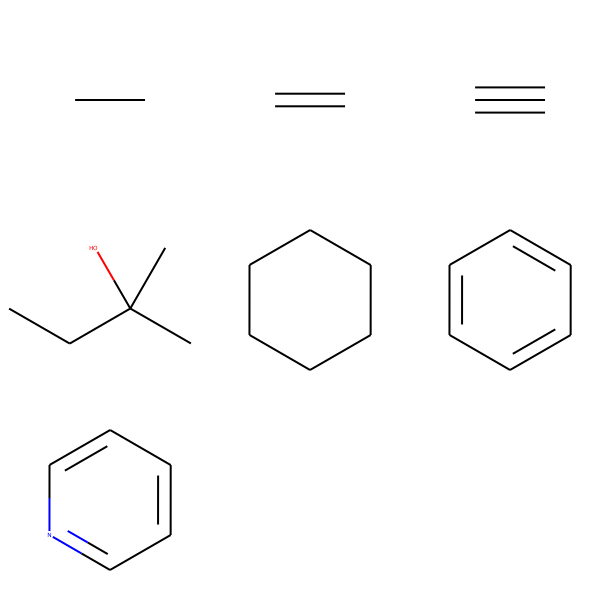

In [ ]:
lista=[etano, eteno, etino, metilbutanol, ciclohexano, benceno, piridina]   #creamos la lista con las moléculas
Draw.MolsToGridImage(lista, useSVG=True)

Ahora es tu turno. En la siguiente linea de cóodigo crea una lista con las cadenas SMILES de las moléculas creadas en la actividad 2 y presenta todas las estructuras en un sólo gráfico.

#**Actividad 4**

Finalmente podemos hacer uso de las bases de datos existentes para importar la estructura de diferentes tipos de moléculas. En la siguiente celda de código importaremos la de la mofrfina desde la base de datos <a href="https://go.drugbank.com/">DrugBank</a>. Para esta actividad:

1.   Abre en una nueva ventana el siguiente link: <a href="https://go.drugbank.com/">DrugBank</a>
2.   Escribe "Morphine" en el buscador de estructuras.
3.   Una vez localizada la molécula, en el link "Download" puedes decargar la estructura de molécula en varios formatos. Elige el formato SIMLES y tendrás la cadena de esta estructura.

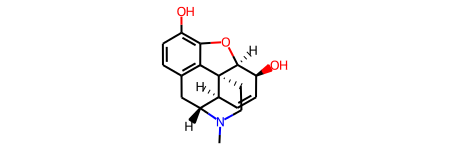

In [ ]:
etino = Chem.MolFromSmiles("[H][C@@]12OC3=C(O)C=CC4=C3[C@@]11CCN(C)[C@]([H])(C4)[C@]1([H])C=C[C@@H]2O")
etino

También podemos importar directamente la información estructural desde la base de datos utilizando el formato `*.mol`. Para esta actividad:

1.   Abre en una nueva ventana el siguiente link: <a href="https://go.drugbank.com/">DrugBank</a>
2.   Escribe "Morphine" en el buscador de estructuras.
3.   Una vez localizada la molécula, en el link "Download" puedes decargar la estructura de molécula en varios formatos. Ahora elige el formato `mol`.
3.   Copia la dirección url donde esta contenida la información en formato `mol`.
4.   En la siguiente celda de código, pega la dirección url dentro de las comillas `""` donde se indica el comentario.
5.   Ejecuta la rutina.


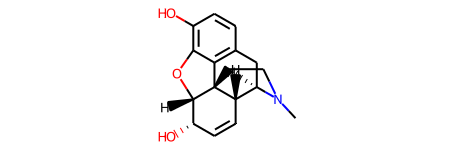

In [ ]:
morfina_url="https://go.drugbank.com/structures/small_molecule_drugs/DB00295.mol"      # Pega dentro de las comillas la dirección url
morfina_mol=requests.get(morfina_url).text
morfina=Chem.MolFromMolBlock(morfina_mol)
morfina

Ahora es tu turno. utilizando la información sobre importación de inoformación desde una base de datos, en la siguiente línea de código crea la rutina para representar la estrucura de las siguientes moléculas: (i) Dopamina, (ii) Tramadol y  (iii) Metoprolol. Puedes utilizaar la base de datos <a href="https://go.drugbank.com/">DrugBank</a> para obtener la información SMILES de las moléculas

Cómo última actividad, en la siguiente celda de código crea una lista con todas las moléculas creadas en todas las actividades y  presentalas en un sólo gráfico.

---
#***Hoy aprendimos***

*  Representación de estructuras en formato SMILES utilizando el software RDKit.

*  Importar información estructural desde una base de datos.

---
#***Enlaces Recomendados***
 

*  Página Oficial RDKit: <a href="https://www.rdkit.org/">RDKit Homepage</a>
*  Tutorial SMILES: <a href="https://medium.com/@hexagono/introducci%C3%B3n-a-smiles-dibujando-mol%C3%A9culas-en-el-bloc-de-notas-3c0df0d09c01">Introducción a SMILES</a>
*  Introduction to RDKit: <a href="https://www.youtube.com/watch?v=9Z9XM9xamDU&t=137s">Chemistry with Phyton</a>

*  Generadores de notación SMILES: (i) <a href="https://pubchem.ncbi.nlm.nih.gov/edit3/index.html">PubChem Sketcher</a>, (ii)<a href="http://www.cheminfo.org/flavor/malaria/Utilities/SMILES_generator___checker/index.html"> SmilesGeneratorChecker</a>

---
#***Referencias***

*   Weininger, D. 1988. SMILES, a chemical language and information system. 1. Introduction to methodology and encoding rules. Journal of Chemical Information and Computer Science 28: 31-36.  <a href="https://pubs.acs.org/doi/10.1021/ci00057a005">doi.10.1021/ci00057a005</a>

*   Weininger, D., A. Weininger, and J.L. Weininger. 1989. SMILES. 2. Algorithm for generation of unique SMILES notation. Journal of Chemical Information and Computer Science 29: 97-101. <a href="https://pubs.acs.org/doi/10.1021/ci00062a008">doi.10.1021/ci00062a008</a>

*   Archivo Web EPA: <a href="https://archive.epa.gov/med/med_archive_03/web/html/smiles.html">Tutorial SMILES</a>